In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplcursors
import ipywidgets as widgets
from IPython.display import  display

import h5py 
import os,sys,glob
import pandas as pd
import ipympl

In [2]:
diffileno = 38031
dfile=glob.glob('../processed/k11-{}-diffraction*.nxs'.format(str(diffileno)))
with h5py.File(dfile[0],'r') as f:
    data=f['processed/result/data'][()]
    qvals=f['processed/result/q'][()]
    kbx = f['entry/diffraction/kb_cs_x'][()]
    kby = f['entry/diffraction/kb_cs_y'][()]
    theta=round(f['entry/diffraction_sum/gts_theta'][()].max(),2)

999


NameError: name 'cor' is not defined

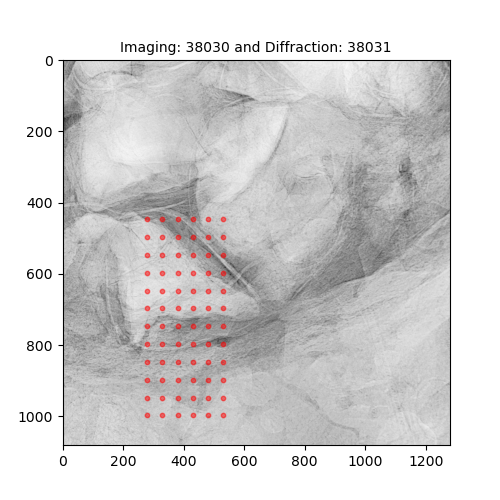

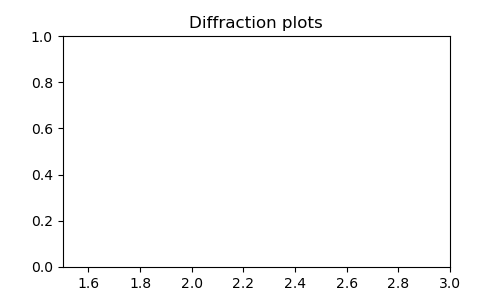

In [17]:
imgfileno = 38030
ifile=glob.glob('../processed/Savu_k11-{0}*/k11-{0}_processed.nxs'.format(str(imgfileno)))

with h5py.File(ifile[0],'r') as f:
    indx = np.where(np.abs(f['entry/input_data/tomo/rotation_angle'][()] - theta) <= 0.05)[0][0]
    print(indx)
    proj=f['entry/intermediate/1-DarkFlatFieldCorrection-tomo/data'][indx,:,:]

# prep for heatmap
#int=pd.DataFrame(temp,columns=['kbx','kby','intensity'])
#new=int.pivot(index='kby', columns='kbx', values='intensity')   


# figure set up
fig1,ax1=plt.subplots(figsize=(5,5))
fig2,ax2=plt.subplots(figsize=(5,3))

ax1.set_xlim(0,1280)
ax1.set_ylim(1080,0)
ax1.set_title('Imaging: ' +str(imgfileno)+' and Diffraction: '+str(diffileno),fontsize=10)
ax1.imshow(proj,cmap='Greys',aspect='auto')

#ax2.set_yscale('log')
ax2.set_xlim(1.5,3.0)
ax2.set_title("Diffraction plots")



temp=[]
scatter_plots=[]
xrd=[]

def plot_scatter(kbx,kby):
    for i in range(len(kbx)):
        for j in range(len(kby)):
            temp.append([kbx[i],kby[j],np.sum(data[j,i,2600:2800])])
            sc=ax1.scatter(kbx[i],kby[j],c='r',s=10,alpha=0.5)
            scatter_plots.append(sc)

combinedsc = [sc for sc in scatter_plots]
plot_scatter(kbx,kby)

scale = 0.05 # this is arbitrary at the moment
kbx_0,kbx_1 =kbx.min()*(1-scale*cor),kbx.max()*(1+scale),
kby_0,kby_1 =kby.min()*(1-scale), kby.max()*(1+scale/cor)
xlen=kbx_1-kbx_0
ylen=kby_1-kby_0
cor = len(kby)/len(kbx)
offset = (kbx_1-kbx_0)/len(kbx)/2

#def plot_image(proj,kbx,kby):
#    plot_scatter(kbx,kby)
    
def plotxrd(df):
    c=0
    for no,row in df.iterrows():
        ax2.plot(qvals,row['y']+c,'k')
        c+=10
        fig2.canvas.draw_idle()

def clear_plot(event):
    ax1.clear()
    ax2.clear()
    xrd.clear()
    scatter_plots.clear()
    plot_scatter(kbx_kby)
    fig2.canvas.draw_idle()

def on_click(sel):
    #print(f'Clicked point: x={sel.target[0]}, y={sel.target[1]}')
    sel.artist.set_facecolor('blue')
    x=np.where(kbx==sel.target[0])[0][0]
    y=np.where(kby==sel.target[1])[0][0]
    xrd.append([sel.target[0],sel.target[1],data[y,x,:]])
    xrd_df=pd.DataFrame(xrd,columns=['kbx','kby','y'])
    xrd_df=xrd_df.drop_duplicates(subset=['kbx','kby'])
    plotxrd(xrd_df)
    
cursor = mplcursors.cursor(combinedsc, hover=False)
cursor.connect("add", lambda sel: on_click(sel))

clear_ax = fig2.add_axes([0.01, 0.91, 0.15, 0.08]) 
clear_button = Button(clear_ax, 'Clear Plot')
clear_button.on_clicked(clear_plot)

plt.show()

999


NameError: name 'cor' is not defined

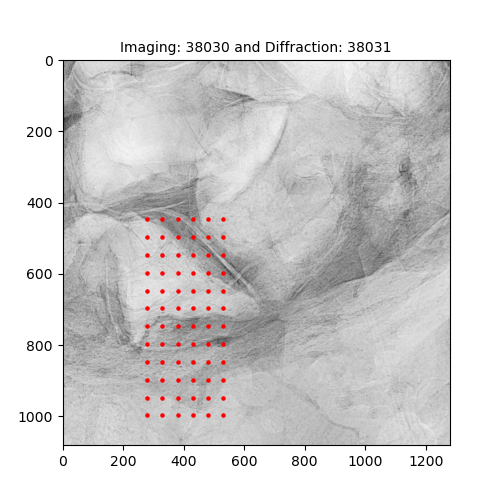

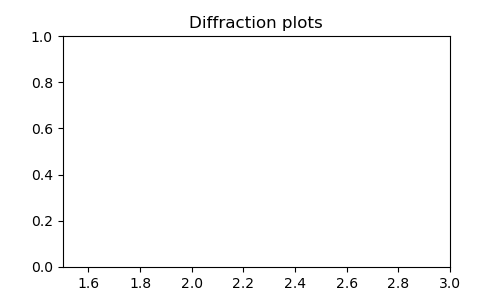

In [4]:
imgfileno = 38030
ifile=glob.glob('../processed/Savu_k11-{0}*/k11-{0}_processed.nxs'.format(str(imgfileno)))

with h5py.File(ifile[0],'r') as f:
    indx = np.where(np.abs(f['entry/input_data/tomo/rotation_angle'][()] - theta) <= 0.05)[0][0]
    print(indx)
    proj=f['entry/intermediate/1-DarkFlatFieldCorrection-tomo/data'][indx,:,:]


# figure set up
fig1,ax1=plt.subplots(figsize=(5,5))
fig2,ax2=plt.subplots(figsize=(5,3))

ax1.set_xlim(0,1280)
ax1.set_ylim(1080,0)
ax1.set_title('Imaging: ' +str(imgfileno)+' and Diffraction: '+str(diffileno),fontsize=10)
ax1.imshow(proj,cmap='Greys',aspect='auto')

#ax2.set_yscale('log')
ax2.set_xlim(1.5,3.0)
ax2.set_title("Diffraction plots")



temp=[]
scatter_plots=[]
xrd=[]
for i in range(len(kbx)):
    for j in range(len(kby)):
        temp.append([kbx[i],kby[j],np.sum(data[j,i,2600:2800])])
        sc=ax1.scatter(kbx[i],kby[j],c='r',s=5,alpha=1)
        scatter_plots.append(sc)

combinedsc = [sc for sc in scatter_plots]


scale = 0.05 # this is arbitrary at the moment
kbx_0,kbx_1 =kbx.min()*(1-scale*cor),kbx.max()*(1+scale),
kby_0,kby_1 =kby.min()*(1-scale), kby.max()*(1+scale/cor)
xlen=kbx_1-kbx_0
ylen=kby_1-kby_0
cor = len(kby)/len(kbx)
offset = (kbx_1-kbx_0)/len(kbx)/2

def plotxrd(df):
    c=0
    for no,row in df.iterrows():
        ax2.plot(qvals,row['y']+c,'k')
        c+=10
        fig2.canvas.draw_idle()

def clear_plot(event):
    ax1.clear()
    #ax2.clear()
    xrd.clear()
    #scatter_plots.clear()
    #plot_scatter(kbx_kby)
    fig2.canvas.draw_idle()

def on_click(sel):
    #print(f'Clicked point: x={sel.target[0]}, y={sel.target[1]}')
    #sel.artist.set_facecolor('blue')
    x=np.where(kbx==sel.target[0])[0][0]
    y=np.where(kby==sel.target[1])[0][0]
    xrd.append([sel.target[0],sel.target[1],data[y,x,:]])
    xrd_df=pd.DataFrame(xrd,columns=['kbx','kby','y'])
    xrd_df=xrd_df.drop_duplicates(subset=['kbx','kby'])
    plotxrd(xrd_df)
    
cursor = mplcursors.cursor(combinedsc, hover=False)
cursor.connect("add", lambda sel: on_click(sel))

clear_ax = fig2.add_axes([0.81, 0.01, 0.1, 0.075]) 
clear_button = Button(clear_ax, 'Clear Plot')
clear_button.on_clicked(clear_plot)

plt.show()

In [5]:
int=pd.DataFrame(temp,columns=['kbx','kby','intensity'])
new=int.pivot(index='kby', columns='kbx', values='intensity')   
plt.imshow(new,cmap='inferno',origin='lower',extent=
          (kbx_0,kbx_1,kby_0,kby_1),
           alpha=0.6)


NameError: name 'kbx_0' is not defined

In [ ]:
imgfileno = 38030
ifile=glob.glob('../processed/Savu_k11-{0}*/k11-{0}_processed.nxs'.format(str(imgfileno)))

with h5py.File(ifile[0],'r') as f:
    indx = np.where(np.abs(f['entry/input_data/tomo/rotation_angle'][()] - theta) <= 0.05)[0][0]
    proj=f['entry/intermediate/1-DarkFlatFieldCorrection-tomo/data'][indx,:,:]

# figure set up
fig1,ax1=plt.subplots(figsize=(5,5))
fig2,ax2=plt.subplots(figsize=(5,3))

ax1.set_xlim(0,1280)
ax1.set_ylim(1080,0)
ax1.set_title('Imaging: ' +str(imgfileno)+' and Diffraction: '+str(diffileno),fontsize=10)
def plot_image(p):
    ax1.imshow(p,cmap='Greys',aspect='auto')
plot_image(proj)
#ax2.set_yscale('log')
ax2.set_xlim(1.5,3.0)
ax2.set_title("Diffraction plots")

#temp=[]
scatter_plots=[]
xrd=[]

def plot_scatter(kbx,kby):
    for i in range(len(kbx)):
        for j in range(len(kby)):
            #temp.append([kbx[i],kby[j],np.sum(data[j,i,2600:2800])])
            sc=ax1.scatter(kbx[i],kby[j],c='r',s=5,alpha=1)
            scatter_plots.append(sc)

def create_buttons():
    cursor = mplcursors.cursor(combinedsc, hover=False)
    cursor.connect("add", lambda sel: on_click(sel))
    clear_ax = fig2.add_axes([0.81, 0.01, 0.1, 0.075]) 
    clear_button = Button(clear_ax, 'Clear Plot')
    clear_button.on_clicked(clear_plot)
    
plot_scatter(kbx,kby)
combinedsc = [sc for sc in scatter_plots]
print(len(combinedsc))
#plot_scatter(kbx,kby)
create_buttons()
scale = 0.05 # this is arbitrary at the moment
kbx_0,kbx_1 =kbx.min()*(1-scale*cor),kbx.max()*(1+scale),
kby_0,kby_1 =kby.min()*(1-scale), kby.max()*(1+scale/cor)
xlen=kbx_1-kbx_0
ylen=kby_1-kby_0
cor = len(kby)/len(kbx)
offset = (kbx_1-kbx_0)/len(kbx)/2

#def plot_image(proj,kbx,kby):
#    plot_scatter(kbx,kby)
    
def plotxrd(df):
    c=0
    for no,row in df.iterrows():
        ax2.plot(qvals,row['y']+c,'k')
        c+=10
        fig2.canvas.draw_idle()

    
def clear_plot(event):
    ax1.clear()
    ax2.clear()
    xrd.clear()
    scatter_plots.clear()
    plot_scatter(kbx,kby)
    plot_image(proj)
    fig1.canvas.draw_idle()
    fig2.canvas.draw_idle()

def on_click(sel):
    #print(f'Clicked point: x={sel.target[0]}, y={sel.target[1]}')
    sel.artist.set_facecolor('blue')
    x=np.where(kbx==sel.target[0])[0][0]
    y=np.where(kby==sel.target[1])[0][0]
    xrd.append([sel.target[0],sel.target[1],data[y,x,:]])
    xrd_df=pd.DataFrame(xrd,columns=['kbx','kby','y'])
    xrd_df=xrd_df.drop_duplicates(subset=['kbx','kby'])
    plotxrd(xrd_df)


plt.show()


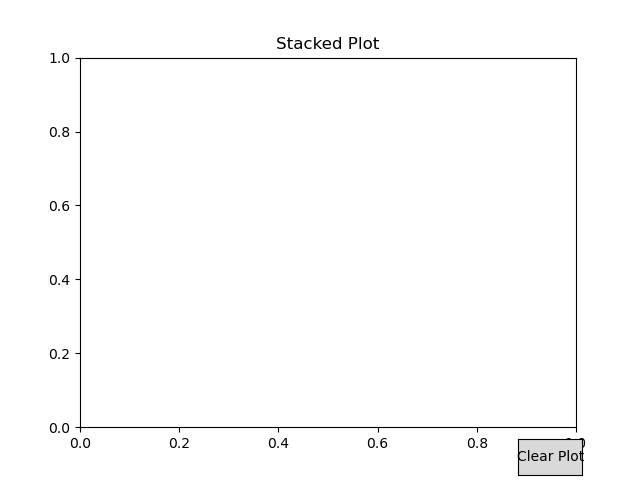

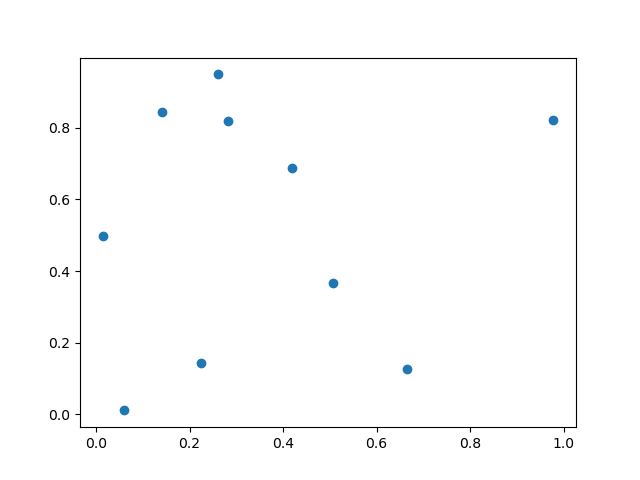

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
from matplotlib.widgets import Button

# Sample data
x = np.random.rand(10)
y = np.random.rand(10)

fig, ax = plt.subplots()
sc = ax.scatter(x, y)

# Create a new figure for the new plot
fig_new, ax_new = plt.subplots()
ax_new.set_title('Stacked Plot')

# Function to update the existing plot with new data
def stack_new_plot():
    new_data = np.random.rand(10)
    ax_new.plot(new_data, label=f'Data {len(ax_new.get_lines()) + 1}')
    ax_new.legend()
    ax_new.set_title('Stacked Plot')
    fig_new.canvas.draw_idle()

# Function to clear the new plot
def clear_plot(event):
    ax_new.clear()
    ax_new.set_title('Stacked Plot')
    fig_new.canvas.draw_idle()

# Add a button to the new plot
clear_ax = fig_new.add_axes([0.81, 0.01, 0.1, 0.075])  # Position the button
clear_button = Button(clear_ax, 'Clear Plot')
clear_button.on_clicked(clear_plot)

# mplcursors setup for scatter plot
cursor = mplcursors.cursor(sc, hover=True)

@cursor.connect("add")
def on_click(sel):
    stack_new_plot()

plt.show()


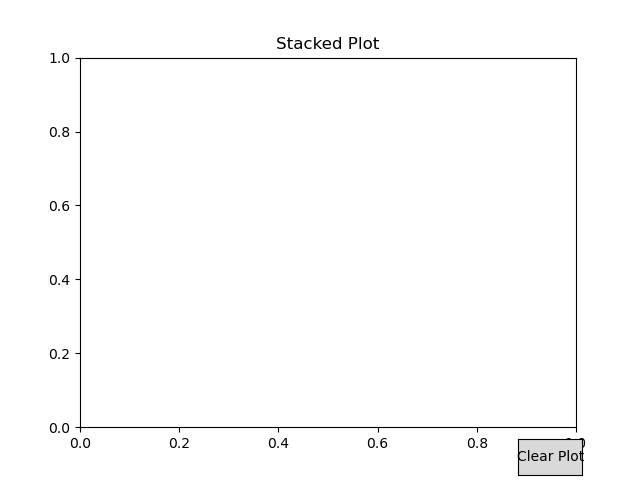

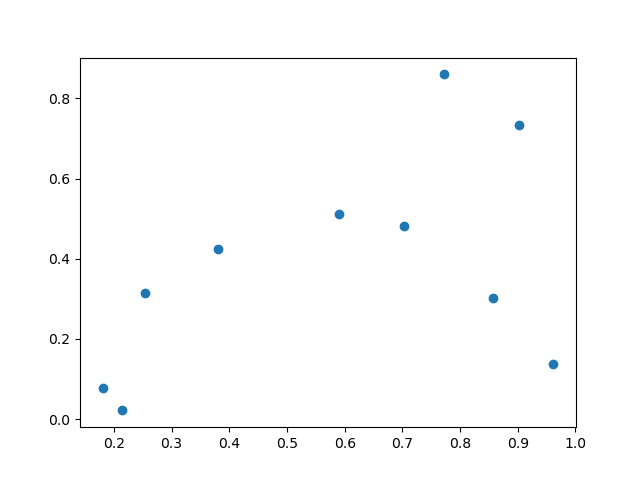

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button

# Sample data
x = np.random.rand(10)
y = np.random.rand(10)

fig, ax = plt.subplots()
sc = ax.scatter(x, y)

# Create a new figure for the new plot
fig_new, ax_new = plt.subplots()
ax_new.set_title('Stacked Plot')

# Function to update the existing plot with new data
def stack_new_plot(event):
    new_data = np.random.rand(10)
    ax_new.plot(new_data, label=f'Data {len(ax_new.get_lines()) + 1}')
    ax_new.legend()
    ax_new.set_title('Stacked Plot')
    fig_new.canvas.draw_idle()

# Function to clear the new plot
def clear_plot(event):
    ax_new.clear()
    ax_new.set_title('Stacked Plot')
    fig_new.canvas.draw_idle()

# Add a button to the new plot
clear_ax = fig_new.add_axes([0.81, 0.01, 0.1, 0.075])  # Position the button
clear_button = Button(clear_ax, 'Clear Plot')
clear_button.on_clicked(clear_plot)

# Event handler for clicking on a point
def on_click(event):
    if event.inaxes == ax:
        click_x = event.xdata
        click_y = event.ydata
        
        # Find the nearest point (if any point is within a threshold distance)
        distances = np.sqrt((x - click_x)**2 + (y - click_y)**2)
        threshold = 0.05  # Adjust this threshold as needed
        nearest_index = np.argmin(distances)
        
        if distances[nearest_index] < threshold:
            stack_new_plot(None)

# Connect the event handler
fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()
